# Part II - (The Impact of Time on Barcelona's Street Accidents)
## by (Andric Ishami)


## Investigation Overview


> In this investigation, I wanted to see the influence time (that is month, day, hour, season or year) has on the number and dimension of accidents happening in Barcelona.


## Dataset Overview

>  This dataset includes 13 numeric variables and 14 string objects/categorical variables. From the numerical variables in this dataset, only 4 of them are usable for analysis; those are: n_deaths, n_vehicles, n_victims, n_wounded_severe and n_wounded_mild.There are 4 time features that are my main features of interest; month, time of day, hour and season.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
accidents = pd.read_csv("accidents_opendata.csv")

## Distribution of Accidents In Barcelona In Months

> Accidents in Barcelona are observed to increase in the end of year (with a peak in October) and the start of year. Once plotted in a month ordered way, the pattern seems easy to notice. 


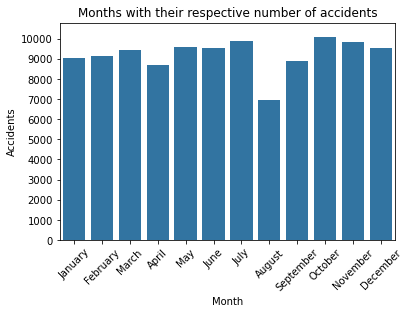

In [3]:
#Making the month_name column an ordered categorical column
cat= ['Gener', 'Febrer', 'Març', 'Abril', 'Maig', 'Juny', 'Juliol', 'Agost', 'Setembre', 'Octubre', 'Novembre', 'Desembre']
cl= pd.api.types.CategoricalDtype(categories=cat, ordered=True)
accidents["month_name"]= accidents.month_name.astype(cl)

#Plotting
color=sb.color_palette()[0]
ticks=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sb.countplot(data=accidents, x='month_name', color=color)
plt.xticks(ticks= np.arange(0,12,1), labels=ticks ,rotation=45)
plt.ylim(0,10800)
plt.yticks(np.arange(0,10100, 1000))
plt.title("Months with their respective number of accidents")
plt.xlabel("Month")
plt.ylabel("Accidents");

## Time of Day and Accidents in Barcelona

> Most of the accidents that happened in the last 10 years happened mostly in the afternoon. A bar chart comparing other time of a day makes this easy to notice.

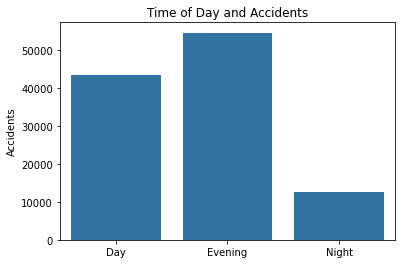

In [4]:
cat= ['Matí', 'Tarda', 'Nit']
cl= pd.api.types.CategoricalDtype(categories=cat, ordered=True)
accidents["cyrcadian"] = accidents.cyrcadian.astype(cl)
color=sb.color_palette()[0]
sb.countplot(data=accidents, x='cyrcadian', color=color)
plt.xticks(np.arange(0,3,1),["Day","Evening","Night"])
plt.ylabel("Accidents")
plt.xlabel("")
plt.title("Time of Day and Accidents");

## Hour of Time and Accidents

> Barcelona being on of the most touristic places in the world, one may wonder if certain busy hours of the day means frequent accidents. It turns out that it's in the afternoon when the streets are busy in Barcelona that most accidents are noticed. 

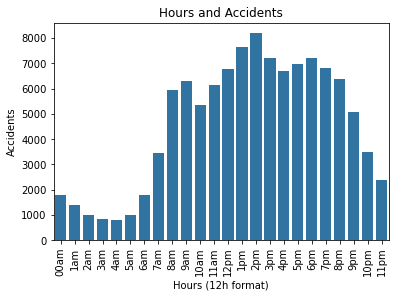

In [5]:
color=sb.color_palette()[0]
sb.countplot(data=accidents, x='hour', color=color)
plt.xticks(np.arange(0,24,1), ["00am",  "1am",  "2am",  "3am",  "4am",  "5am",  "6am",  "7am",  "8am",  "9am", "10am", "11am", "12pm",  "1pm",  "2pm",  "3pm",  "4pm",  "5pm",  "6pm",  "7pm",  "8pm",  "9pm", "10pm", "11pm"], rotation=90)
plt.xlabel("Hours (12h format)")
plt.ylabel("Accidents")
plt.title("Hours and Accidents");

## Time of Day vs Size of Accident

> Do the size of accidents vary depending on what time of the day it is? Plotting the number ofvehicles involved in each accident with the time of the day gives us a hint. The bigger the number of cars in an accident, the bigger the scope/dimension of the accident.

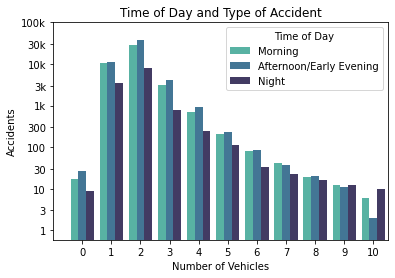

In [6]:
sb.countplot(data=accidents, x="n_vehicles", hue= "cyrcadian", palette="mako_r")
plt.xlim(-1,10.5)
plt.ylabel("Accidents")
plt.xlabel("Number of Vehicles")
plt.title("Time of Day and Type of Accident")
plt.legend(title= "Time of Day", labels=["Morning", "Afternoon/Early Evening", "Night"])
plt.yscale("log")
ticks = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000]
labels=["1", "3", "10", "30","100","300","1k","3k","10k", "30k", "100k"]
ax=plt.gca()
ax.set(yticks = ticks, yticklabels = labels)
plt.minorticks_off()
plt.xticks(np.arange(0,11,1),np.arange(0,11,1));

## Number of Deaths vs Seasons from 2010 to 2021

The seasons play an important role in a touristic city such as Barcelona, but is it influential on the deaths from street accidents? I also wanted to see how had this influence been looking for the past 10 years.

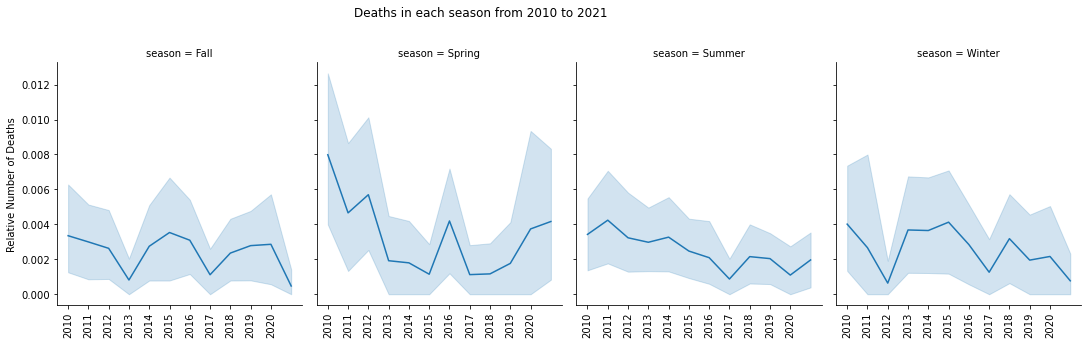

In [7]:
#Binning to get the season feature
accidents["season"]= pd.cut(x=accidents.month, bins=[1,2,4,8,11,12], labels=["Winter","Spring","Summer","Fall","Winter"], ordered=False)

#Plotting
g= sb.FacetGrid(data=accidents, col="season", col_wrap=6, height=3, aspect=0.87, size=4.3, palette="mako")
g.map(sb.lineplot, "year", "n_deaths")
plt.suptitle("Deaths in each season from 2010 to 2021", x=0.3, y=1.10)
g.axes[0].set_ylabel("Relative Number of Deaths")
g.set(xticks = np.arange(2010,2021,1))
[plt.setp(ax.get_xticklabels(), rotation=90) for ax in g.axes.flat]
for i in np.arange(4):
    g.axes[i].set_xlabel("");

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [ ]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 